In [209]:
# Import the required libraries and dependencies
import pandas as pd
import os
import requests
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [210]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

In [211]:
## Evaluate the Cryptocurrency Wallet by Using the Requests Library
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [212]:
# Step 1: Create a variable named monthly_income, and set its value to 12000
monthly_income=12000

In [213]:
# Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [214]:
# Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.
btc_response = requests.get(btc_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19026643,
            "id": 1,
            "last_updated": 1651337065,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 735421049750,
                    "percent_change_1h": 0.447229824310573,
                    "percent_change_24h": -0.199760694438356,
                    "percent_change_7d": -2.77657706210974,
                    "percentage_change_1h": 0.447229824310573,
                    "percentage_change_24h": -0.199760694438356,
                    "percentage_change_7d": -2.77657706210974,
                    "price": 38653.0,
                    "volume_24h": 20962932711
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19026643,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [215]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 120591394,
            "id": 1027,
            "last_updated": 1651336962,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 340320936542,
                    "percent_change_1h": 0.225287827815119,
                    "percent_change_24h": -0.393810901911272,
                    "percent_change_7d": -4.97550796062108,
                    "percentage_change_1h": 0.225287827815119,
                    "percentage_change_24h": -0.393810901911272,
                    "percentage_change_7d": -4.97550796062108,
                    "price": 2819.46,
                    "volume_24h": 13272774024
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120591394,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocu

In [216]:
# Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']
# btc_price = (f' The current BTC price is $ {btc_price}')                                
# Print the current price of BTC
print(f'The current BTC price is $ {btc_price}')


The current BTC price is $ 38653.0


In [217]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
# eth_price = (f' The current ETH price is $ {eth_price}')
# Print the current price of ETH
print(f'The current ETH price is $ {eth_price}')



The current ETH price is $ 2819.46


In [218]:
# Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.
# Compute the current value of the BTC holding 
# price * total in portfolio
btc_value = btc_price * btc_coins
print(f'The current value of the BTC holding is $ {btc_value}')

The current value of the BTC holding is $ 46383.6


In [219]:
# Compute the current value of the ETH holding 
eth_value = eth_price * eth_coins
# print the answer as a string
print(f'The current value of the ETH holding is $ {eth_value}')

The current value of the ETH holding is $ 14943.137999999999


In [220]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_value_crypto = eth_value + btc_value
print(f' The total value of the cryptocurrency wallet is $ {total_value_crypto}')


 The total value of the cryptocurrency wallet is $ 61326.738


In [221]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200



In [222]:
# Set the variables for the Alpaca API and secret keys
Alpaca_API_Key = os.getenv("ALPACA_API_KEY")
Alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(Alpaca_API_Key)

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(Alpaca_API_Key, Alpaca_secret_key, api_version="v2")



In [223]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"


# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# start_date= pd.Timestamp("2022-04-28",tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2022-04-28", tz="America/New_York").isoformat()
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
yesterday = pd.Timestamp("2022-04-29",tz="America/New_York").isoformat()


In [224]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = yesterday, 
    end = yesterday,
).df
portfolio_df

# Reorganize the DataFrame
# Separate ticker data
SPY = portfolio_df[portfolio_df['symbol']== "SPY"].drop('symbol', axis=1)
AGG = portfolio_df[portfolio_df['symbol']== "AGG"].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
portfolio_df = pd.concat([SPY, AGG], axis=1, keys = ['SPY', 'AGG'])                                                     


# Review the first 5 rows of the Alpaca DataFrame
portfolio_df



SPY                                    \
                             open    high     low  close     volume   
timestamp                                                             
2022-04-29 04:00:00+00:00  423.56  425.87  411.21  412.0  145242451   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-29 04:00:00+00:00     1143618  416.879474  102.92  103.27  102.82   

                                                                   
                            close   volume trade_count       vwap  
timestamp                                                          
2022-04-29 04:00:00+00:00  102.87  9922012       33928  103.00342

In [225]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(portfolio_df["AGG"]['close'])


# Print the AGG closing price
print(f'The AGG closing price is $ {agg_close_price}')


The AGG closing price is $ 102.87


In [226]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(portfolio_df['SPY']['close'])
# Print the SPY closing price
print(f'The SPY closing price is $ {spy_close_price}')


The SPY closing price is $ 412.0


In [227]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
print(f'The current value of the bond portion of the portfolio is $ {agg_value}')



The current value of the bond portion of the portfolio is $ 20574.0


In [228]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
print(f'The current value of the stock portion of the portfolio is $ {spy_value}')



The current value of the stock portion of the portfolio is $ 45320.0


In [229]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value+agg_value

# Print the current balance of the stock and bond portion of the portfolio
print( f'The current balance of the stock and bond portion of the portfolio is $ {total_stocks_bonds}')



The current balance of the stock and bond portion of the portfolio is $ 65894.0


In [230]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_stocks_bonds + total_value_crypto

# Print total
print(f'The total value of the members entire savings portfolio is $ {total_portfolio}')



The total value of the members entire savings portfolio is $ 127220.738


In [231]:
# Consolidate financial assets data into a Python list
savings_data = [total_stocks_bonds, total_value_crypto]

# Review the Python list savings_data
savings_data



[65894.0, 61326.738]

In [238]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])
# Display the savings_df DataFrame
display(savings_df)

,amount
crypto,65894.000
stock/bond,61326.738


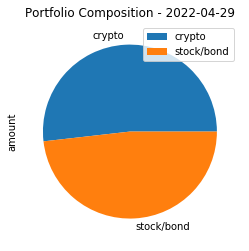

In [239]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='amount', title='Portfolio Composition - 2022-04-29')

In [241]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income*3

In [256]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.
distance= emergency_fund_value-total_portfolio

if total_portfolio>emergency_fund_value:
    display("Congratulations member! You have sufficient money in this fund.")
# Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.
elif total_portfolio==emergency_fund_value:
    display("Congratulations on reaching this important financial goal. Your emergency fund is equal to your total portfolio.")
# Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)
else: 
    display(distance)



'Congratulations member! You have sufficient money in this fund.'

# Part 2: Create a Financial Planner for Retirement

In [259]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date=pd.Timestamp("2019-04-29", tz="America/New_York").isoformat()
end_date=pd.Timestamp("2022-04-29", tz="america/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows=1000

In [269]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
pricing_df = alpaca.get_bars(tickers, timeframe, start=start_date, end=end_date).df

# Reorganize the DataFrame
# Separate ticker data
SPY = pricing_df[pricing_df['symbol']== "SPY"].drop('symbol', axis=1)
AGG = pricing_df[pricing_df['symbol']== "AGG"].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
pricing_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame
display(pricing_df.head())
display(pricing_df.tail())



SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2019-04-29 04:00:00+00:00  293.53  294.45  293.4100  293.87  61675682   
2019-04-30 04:00:00+00:00  293.52  294.34  291.9200  294.02  81411933   
2019-05-01 04:00:00+00:00  294.76  294.95  291.8000  291.81  71921870   
2019-05-02 04:00:00+00:00  291.68  292.70  289.5200  291.18  65058183   
2019-05-03 04:00:00+00:00  292.80  294.34  291.2998  294.03  56579556   

                                                      AGG                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2019-04-29 04:00:00+00:00      186857  293.871519  108.56  108.62  108.4900   
2019-04-30 04:00:00+00:00      254912  293.551590  108.56  108.68  108.5135   
2019-05-01 04:00:00+00:00      337374  293.457138  108.47  108.76  108.3200   
2019-05-02 04:00:00+00:00      342564  291.101680  108.30  108.33  108.1000   
2019-05-03 04:00:00+00:00      249557  293.438891  108.32  108.42  108.2750   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-29 04:00:00+00:00  108.52  2782634        8977  108.539174  
2019-04-30 04:00:00+00:00  108.59  7491505       17892  108.620462  
2019-05-01 04:00:00+00:00  108.40  6387911       23490  108.455634  
2019-05-02 04:00:00+00:00  108.16  3379510       10083  108.172602  
2019-05-03 04:00:00+00:00  108.34  2326299       11699  108.329456

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2022-04-25 04:00:00+00:00  423.70  428.69  418.84  428.51  119103454   
2022-04-26 04:00:00+00:00  425.92  426.04  416.07  416.10  101074178   
2022-04-27 04:00:00+00:00  417.38  422.92  415.01  417.20  120771109   
2022-04-28 04:00:00+00:00  422.17  429.64  417.60  427.81  104665724   
2022-04-29 04:00:00+00:00  423.56  425.87  411.21  412.00  145242451   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2022-04-25 04:00:00+00:00     1139830  423.952513  103.47  103.93  103.470   
2022-04-26 04:00:00+00:00     1001090  420.127020  104.13  104.13  103.800   
2022-04-27 04:00:00+00:00     1005154  418.848698  103.94  104.01  103.530   
2022-04-28 04:00:00+00:00      801719  424.039318  103.33  103.51  103.165   
2022-04-29 04:00:00+00:00     1143618  416.879474  102.92  103.27  102.820   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-25 04:00:00+00:00  103.63   8768318       31373  103.691097  
2022-04-26 04:00:00+00:00  103.95   8533802       30915  103.960003  
2022-04-27 04:00:00+00:00  103.53  11102819       39392  103.679752  
2022-04-28 04:00:00+00:00  103.49   9901783       32976  103.361421  
2022-04-29 04:00:00+00:00  102.87   9922012       33928  103.003420

In [ ]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE



In [ ]:
MC_thirty_year = MCSimulation(prices_df, weights = [.6, .4], num_simulation = 100, num_trading_days = 252*30)